# Analysis about fuel cycle scenarios for HALEU fueled reactors

The purpose of this notebook is to compare the results of using the updated 
function transition_metrics.add_receiver_prototype, which avoids the creation 
and use of the Materials metric to create the TransactionQuantity metric. This analysis 
of this notebook compares the results of analysis of a fuel cycle to what is 
reported in [my published article](https://www.epj-n.org/articles/epjn/full_html/2021/01/epjn210024/epjn210024.html).

1 total fuel cycle scenario is considered for this work:
* Scenario 1: Current US fuel cycle


Results include the mass of enriched uranium, and the total SWU capacity 
required in each scenario. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'../../../scripts/')

In [5]:
import cymetric as cym
import transition_metrics as tm

In [6]:
current_outfile = '../outputs/united_states_2020.sqlite'

## Material Transactions

In [10]:
# All transactions
current_transactions = tm.add_receiver_prototype(current_outfile)

In [11]:
# Obtaining just the fresh_uox transactions for each scenario
current_uox = tm.commodity_mass_traded(current_transactions, 'fresh_uox')

### Plotting material transactions

Text(0.5, 1.0, 'Mass of uranium supplied to all reactors')

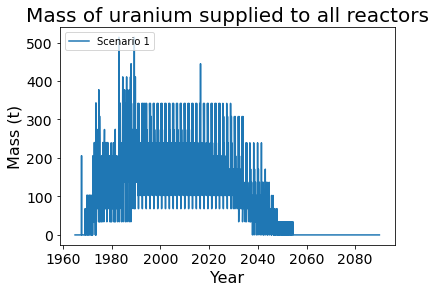

In [12]:
# Comparing fresh_uox transactions to all reactors
plt.figure()

plt.plot(current_uox['Year'], current_uox['Quantity']/1000, 
         label='Scenario 1')
plt.legend(loc=2)
plt.ylabel('Mass (t)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mass of uranium supplied to all reactors', fontsize=20)

Text(0.5, 1.0, 'Mass of uranium supplied to all reactors')

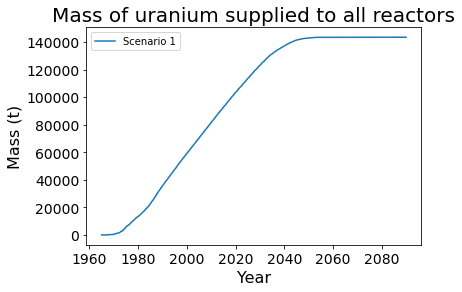

In [13]:
plt.figure()
plt.plot(current_uox['Year'], current_uox['Quantity'].cumsum()/1000, 
         label='Scenario 1')
plt.legend(loc=2)
plt.ylabel('Mass (t)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mass of uranium supplied to all reactors', fontsize=20)

In [23]:
print('average = ', current_uox['Quantity'].mean())
print('maximum = ', current_uox['Quantity'].max())
print('average prior to 2025 = ', current_uox['Quantity'][0:721].mean())
print('total after 2025 = ', current_uox['Quantity'][721:].cumsum()[1499])

average =  95653.23651452248
maximum =  513717.84232364414
average prior to 2025 =  157602.2525192643
total after 2025 =  29848630.705394212


Reported values in article:
* 96.2 MTU/month average
* 513.7 MTU max
* 157.6 MTU/month average prior to 2025
* 30,635.0 MTU total after 2025

## SWU Calculations
SWU = (P*V(x_p) + T*V(x_t) - F*V(x_f))*t

V(x_i) = (2*x_i-1)*ln(x_i/(1-x_i))

In [15]:
#Defining assays for LEU product, tails, and feed material
leu_p = 0.045
mmr_p = 0.13
xe_p = 0.155
x_f = 0.00711
x_t = 0.002

### Total SWU

In [16]:
# Scenario 1
current_tails = tm.calculate_tails(current_uox['Quantity'], leu_p, x_t, x_f)
current_feed = tm.calculate_feed(current_uox['Quantity'], current_tails)
current_swu = tm.calculate_SWU(current_uox['Quantity'], leu_p, 
                               current_tails, x_t, 
                               current_feed, x_f)
current_swu = current_swu.to_frame().reset_index()
current_swu = current_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu = tm.add_year(current_swu)

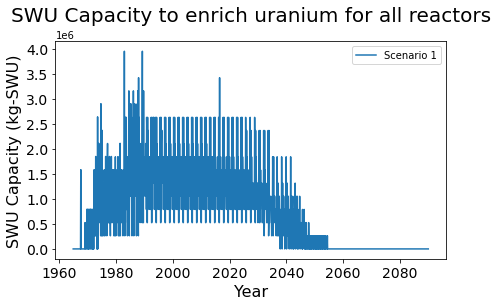

In [17]:
plt.figure(figsize=(7,4))
plt.plot(current_swu['Year'], current_swu['SWU'], label='Scenario 1')

plt.xlabel('Year', fontsize=16)
plt.ylabel('SWU Capacity (kg-SWU)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
title = plt.title('SWU Capacity to enrich uranium for all reactors', fontsize=20, pad=20)
plt.legend()